# Run this before anything starts

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import cv2 as cv
from PIL import Image
import pickle
import random
from numpy import savetxt
import tensorflow as tf

from utility_function import img_resize, model_namer, model_namer_description, save_ml_model, load_ml_model, load_training_data

# (Optional) Load  sample FMC data from .mat file

In [5]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']

print(list(fmc.shape))
print(type(fmc))

[4472, 16, 16]
<class 'numpy.ndarray'>


(895, 256)


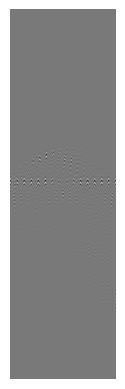

In [7]:
fmc = fmc.reshape(4472, 16 * 16)
fmc = fmc[0::5]/(10**-14) * 255
print(fmc.shape)


plt.imshow(fmc, cmap='gray')
plt.axis('off')
plt.savefig('fmc_image_plt.png')

# Create training data (OUTDATED, check create_training_data.py)

VERY VERY USEFUL VIDEO TUTORIAL!!!\
https://www.youtube.com/watch?v=j-3vuBynnOE

In [38]:
def read_gray_image(dirName, imageName, plotting = False):
    
    image = cv.imread(f'{dirName}/{imageName}', cv.IMREAD_GRAYSCALE)
    print(f'The shape of the GREYSCALE image is {image.shape}')
    if plotting == True:
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
    return image

# read image test
index = 1
dirName_pic = '/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig'
imgName = f'defect_{index}_yshift_60.png'
image = read_gray_image(dirName_pic, imgName, plotting = False)

In [12]:
def create_training_data(subsample = True):
    training_data = []
    dirName_fmc = '/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/FMC_variable'
    dirName_pic = '/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig'
    
    for index in range(1,2001):
        filename = f'fmc_{index}.mat'
        imgName = f'defect_{index}_yshift_60.png'
        
        mat = scipy.io.loadmat(f'{dirName_fmc}/{filename}')
        fmc = mat['timeTraces']
        
        if subsample == True:
            fmc = fmc[0::5]
        else:
            pass
        
        image = read_gray_image(dirName_pic, imgName, plotting = False)
        # I need to append ([fmc, label])
        training_data.append([fmc, image, index])
        
    pickle_out = open("training_data_subsampled.pickle","wb")
    pickle.dump(training_data, pickle_out)
    pickle_out.close()
        
    return training_data
        
# subsample every 5th data
# training_data = create_training_data(subsample = True)

# Store training data in a pickle

https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

In [57]:
import pickle

pickle_out = open("training_data.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

# x contains training data and y contains the label

# pickle_out = open("x.pickle","wb")
# pickle.dump(x, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

# Load training data from a pickle and check the result

Apply scaler on fmc data:
https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix

### 1. Load training_data_subsampled_x and y.pickle (Update 22/2/23)

In [70]:
pickle_in = open("data_subsampled_no_backwall_crop_3500_X.pickle","rb")
X = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {X.shape}')
print(f'The shape of a dataset: {X[1].shape}')

The shape of entire training dataset: (3500, 895, 16, 16, 1)
The shape of a dataset: (895, 16, 16, 1)


In [71]:
pickle_in = open("data_subsampled_no_backwall_crop_3500_y.pickle","rb")
y = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {y.shape}')
print(f'The shape of a dataset: {y[1].shape}')

The shape of entire training dataset: (3500, 120, 240)
The shape of a dataset: (120, 240)


Random number is 1323!
Image size after is (60, 120) after resizing 50%


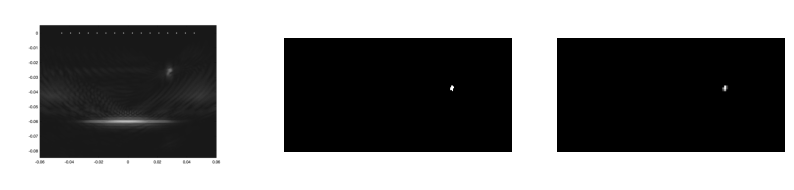

The random column plotted is 12


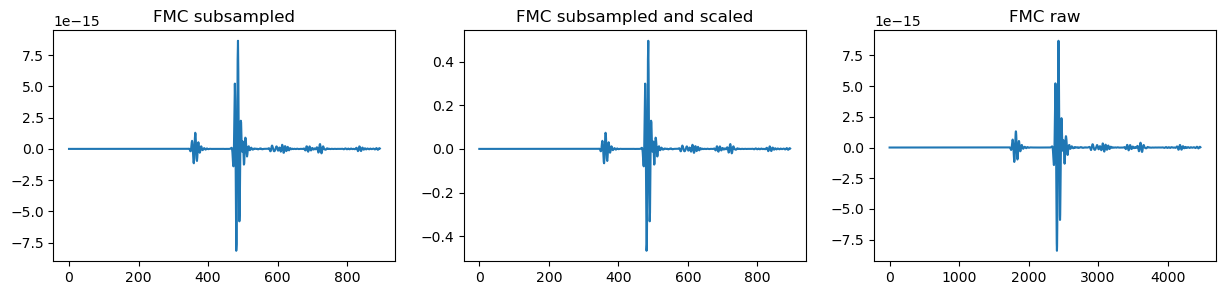

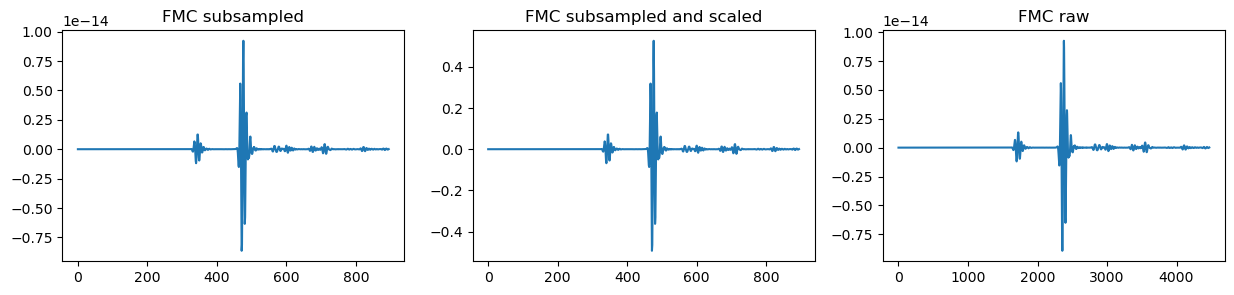

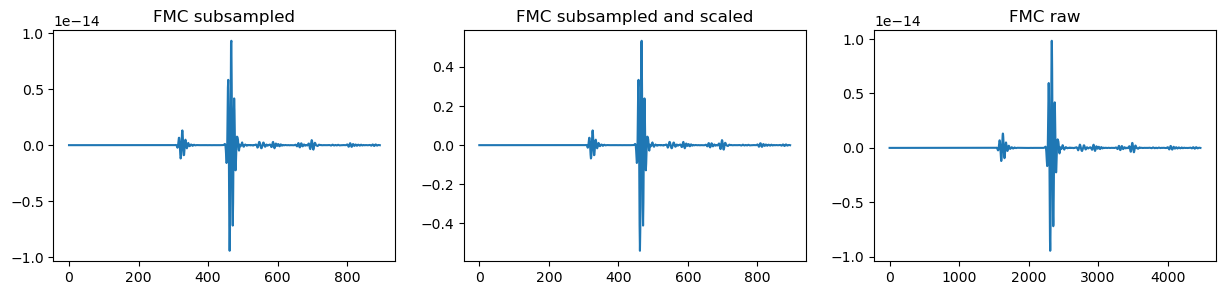

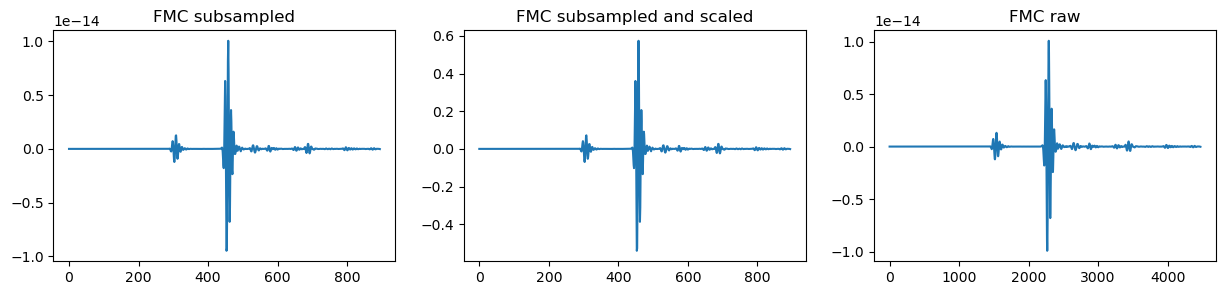

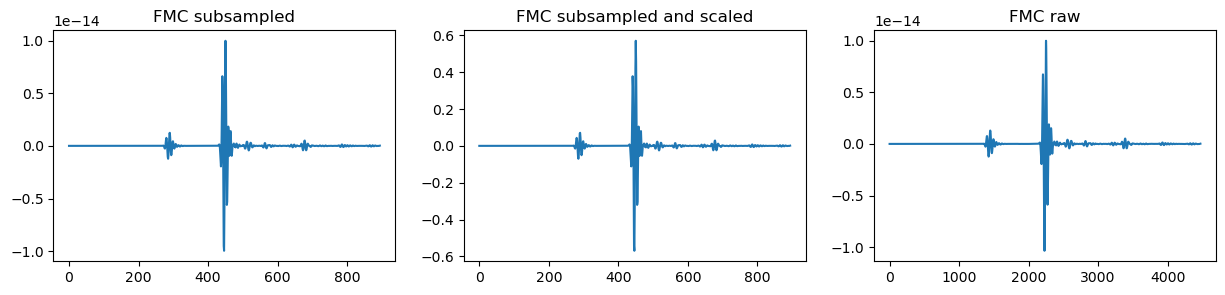

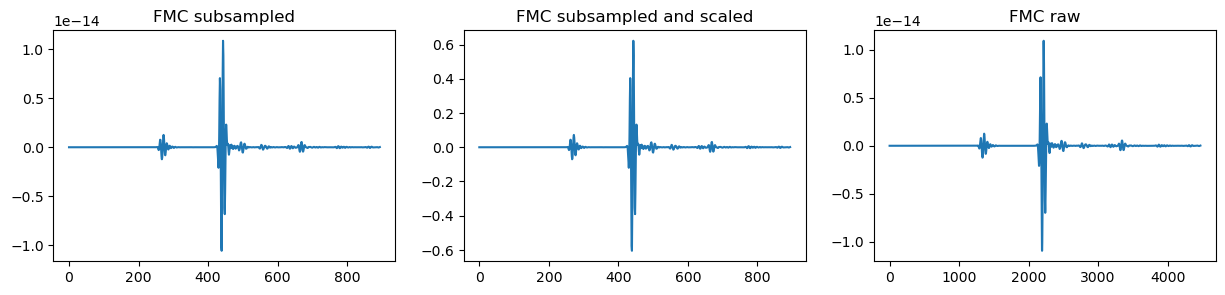

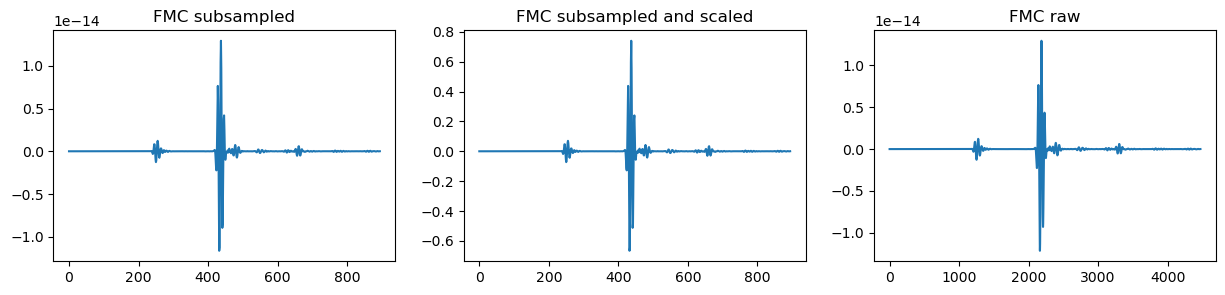

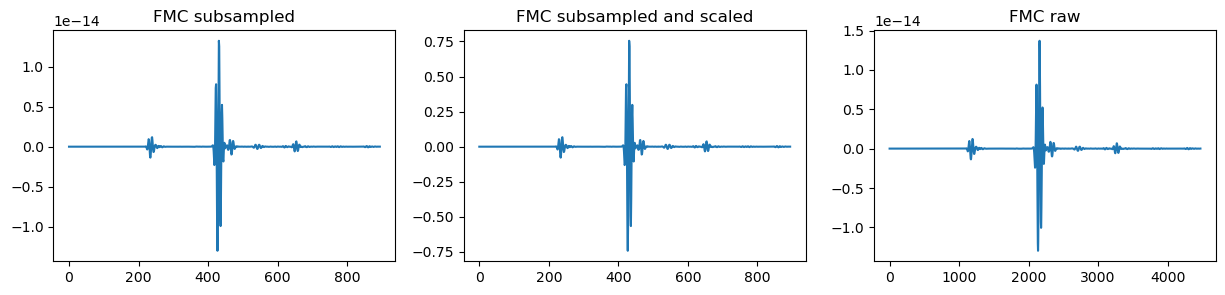

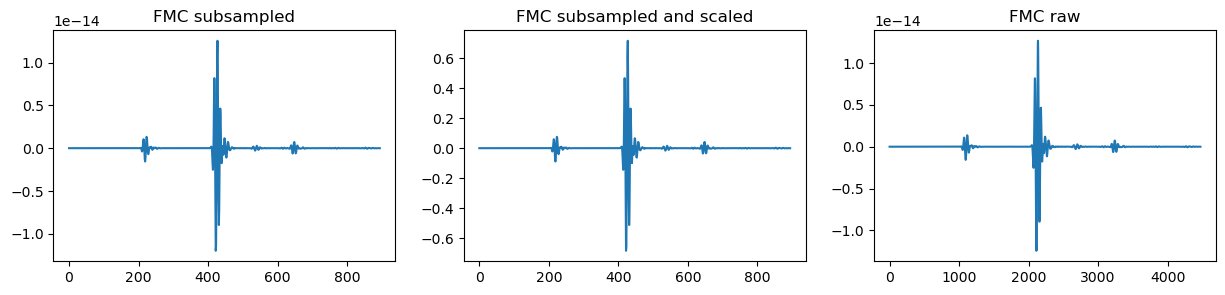

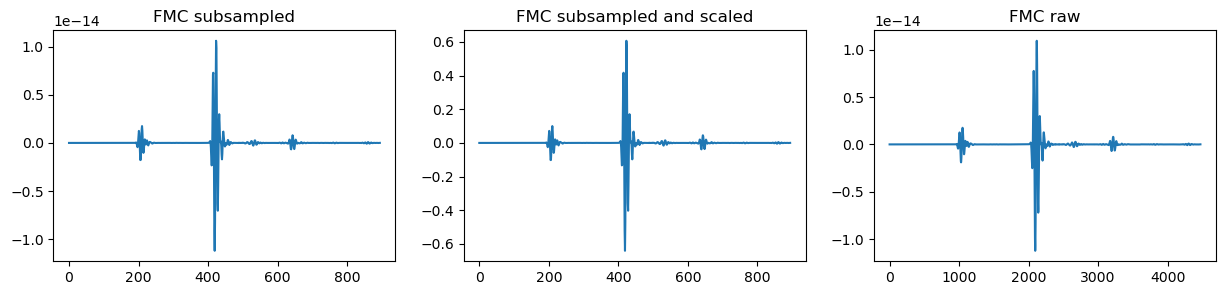

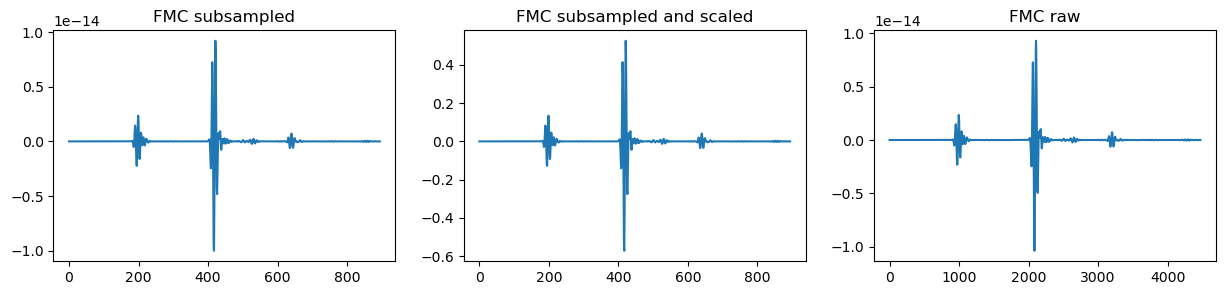

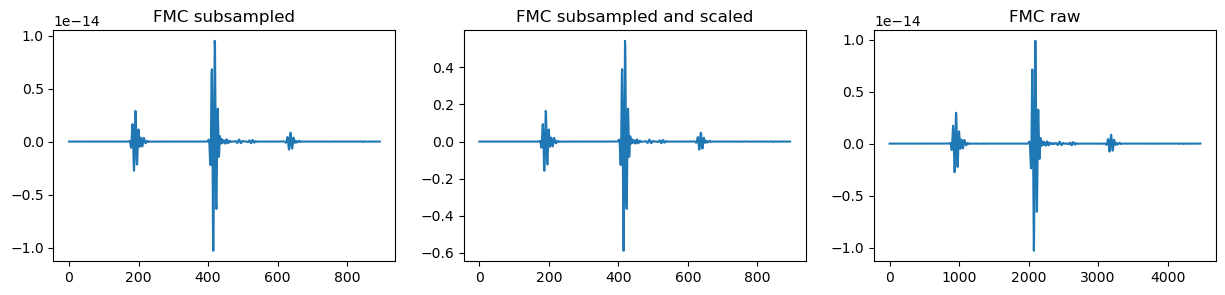

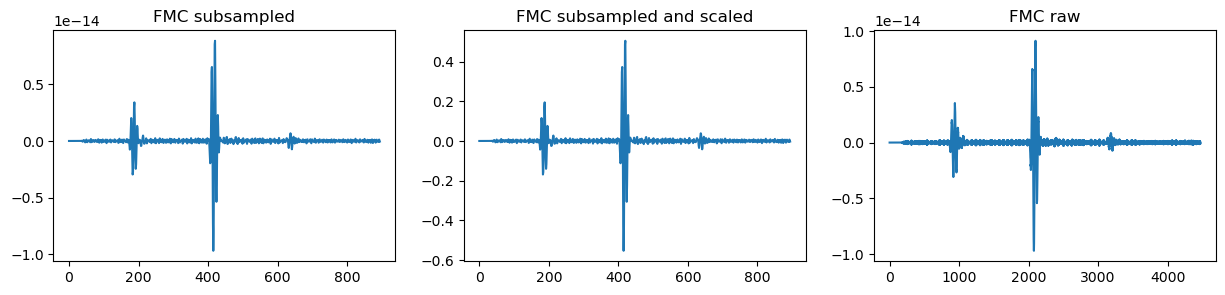

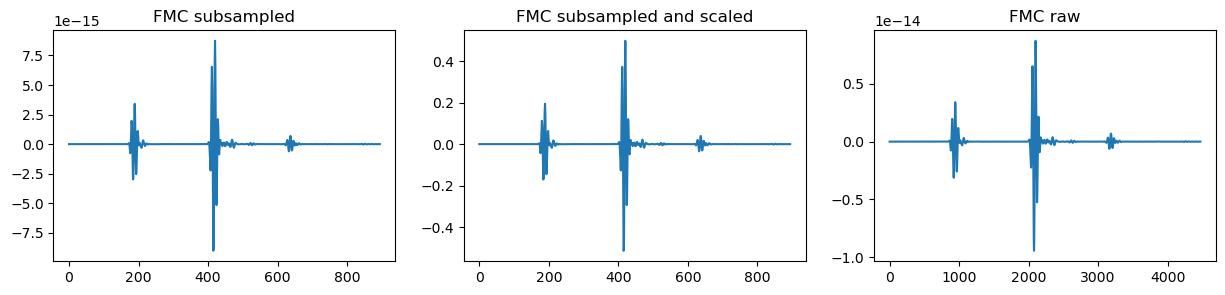

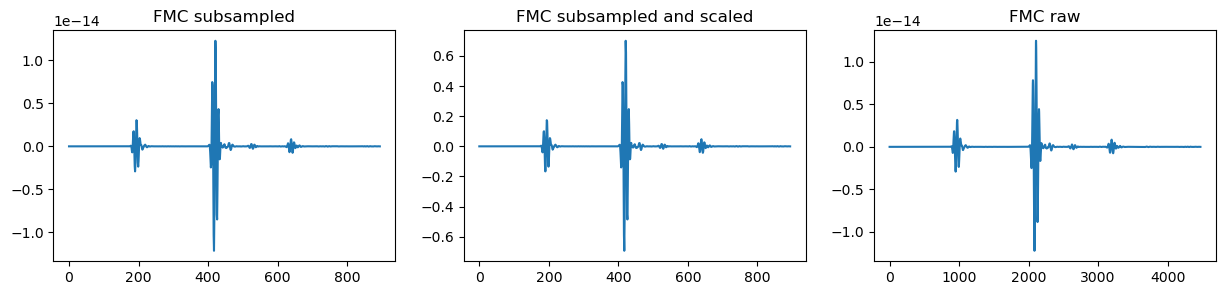

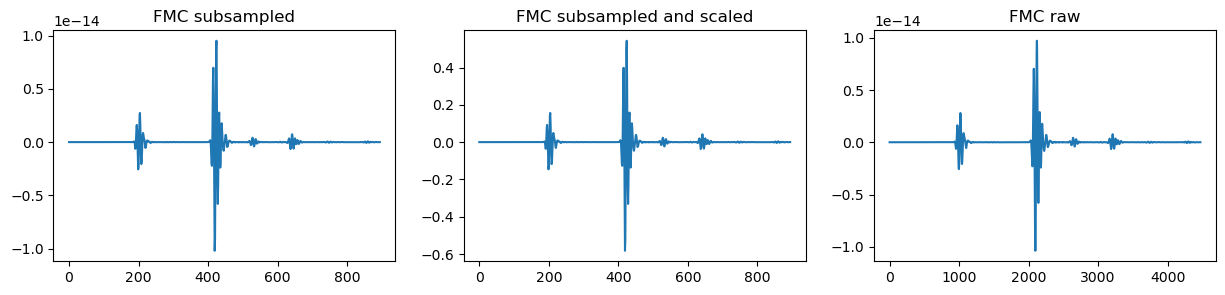

In [72]:
# test whether the data a stored properly

rand_num = random.randint(1,3501)
print(f'Random number is {rand_num}!')

# Directory of the files
dirName_das_fmc = "imageGenerate_2022/DAS_Figure_FMC"
dirName_fmc = "imageGenerate_2022/FMC_variable"

index = rand_num + 1
f = plt.figure(figsize=(10,4))

# Read image in greyscale 
image_das_fmc = cv.imread(f'{dirName_das_fmc}/Figure_{index}_fmc.png',cv.IMREAD_GRAYSCALE)  # convert to array
yplot = y[rand_num].astype('float')

scale_percent = 50 # percent of original size
width = int(yplot.shape[1] * scale_percent / 100)
height = int(yplot.shape[0] * scale_percent / 100)
dim = (width, height)

yplot_resize = cv.resize(yplot, dim, interpolation = cv.INTER_AREA)
print(f'Image size after is {yplot_resize.shape} after resizing {scale_percent}%')

# Plot the images (y)
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.imshow(image_das_fmc, cmap='gray')
ax.axis('off')
ax2.imshow(yplot, cmap='gray')
ax2.axis('off')
ax3.imshow(yplot_resize, cmap='gray')
ax3.axis('off')
plt.show()

fmc_select = X[rand_num]
# print(fmc_select.shape[-1])

# Scale function 
fmc_select_scale = fmc_select / 1.75e-14

filename = f'fmc_{index}.mat'
mat = scipy.io.loadmat(f'{dirName_fmc}/{filename}')
# fmc_raw is not subsampled
fmc_raw = mat['timeTraces']

# plot a random column of fmc
rand_col = random.randint(0,15)
print(f'The random column plotted is {rand_col}')

for i in range(0,16):    
    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    ax.set_title('FMC subsampled')
    ax.plot(fmc_select[:,rand_col,i])
    ax2.set_title('FMC subsampled and scaled')
    ax2.plot(fmc_select_scale[:,rand_col,i])
    ax3.set_title('FMC raw')
    ax3.plot(fmc_raw[:,rand_col,i])
    plt.show()


# Noice Investigation (6/3/2023)

In [53]:
# With noise
dirname_noise = 'imageGenerate_2022/FMC_variable_noise'
filename = 'fmc_3501_0.mat'
filename_noise = 'fmc_3501_100.mat'

mat_noise = scipy.io.loadmat(f'{dirname_noise}/{filename_noise}')
fmc_noise = mat_noise['timeTraces'][::5]/1.75e-14

mat = scipy.io.loadmat(f'{dirname_noise}/{filename}')
fmc = mat['timeTraces'][::5]/1.75e-14

fmc_select_noise = fmc_noise[:,:,0]
fmc_select = fmc[:,:,0]


noise_level_lst = []


# for 16 layers (3rd dimension)
for i in range(16):
    
    # for 16 columns (2nd dimension)
    for j in range(16):
        
    # Use the first 30 data to compute the noise level
        noise_select = fmc_select_noise[:,j][:30]

        noise_level = np.sqrt(np.mean(noise_select**2))
#         print(noise_level)
        
        noise_level_lst.append(noise_level)
#         fig, ax = plt.subplots(1,2, figsize = (10,2))
#         ax[0].plot(fmc_select[:,j])
#         ax[0].set_xlim(0,30)
#         ax[1].plot(fmc_select_noise[:,j])
#         ax[1].set_xlim(0,30)
#         plt.show()


print(len(noise_level_lst))

256


In [53]:
# Signal to noise ratio investigation # 29/5/2023

dirname_noise = 'imageGenerate_2022/FMC_variable_noise'

df_snr = pd.DataFrame(columns=np.arange(0, 110, 10))

for index in range(3501, 3601):
    
    # Read file without noise
    filename = f'fmc_{index}_0.mat'

    SNR_lst = []
    for noise in range(0, 110, 10):

        # Read file with noise at noise level
        filename_noise = f'fmc_{index}_{noise}.mat'

        mat_noise = scipy.io.loadmat(f'{dirname_noise}/{filename_noise}')
        fmc_noise = mat_noise['timeTraces'][::5]/1.75e-14

        mat = scipy.io.loadmat(f'{dirname_noise}/{filename}')
        fmc = mat['timeTraces'][::5]/1.75e-14

        # Calculate peak of the original signal
        peak = np.max(np.abs(fmc[:,0, 0]))

        # fig = plt.figure(figsize=(10, 4))
        # plt.plot(fmc_noise[:, 0, 0], c = '#6181ad')
        # plt.plot(fmc[:, 0, 0], c = '#CA3C53')
        # plt.show()

        # fig = plt.figure(figsize=(10, 4))
        
        # Extrat only the noise region (first 100 data)
        noise_only = fmc_noise[:, 0, 0][:100]
        rms = np.sqrt(np.mean(noise_only**2))

        # plt.plot(fmc_noise[:, 0, 0][:100], c = '#6181ad')
        # plt.show()

        SNR = 20*np.log10(peak/rms)
        SNR_lst.append(SNR)

#         print(f'Noise level = {noise}')
#         print(f'Peak of the signal is {np.max(fmc[:,:,0])}')
#         print(f'The root mean square of noise is {rms}')
#         print(f'The signal to noise ratio is = {SNR}')

    df_snr.loc[len(df_snr)] = SNR_lst


In [55]:
# df_snr.to_csv('SNR_ratio_summary.csv')

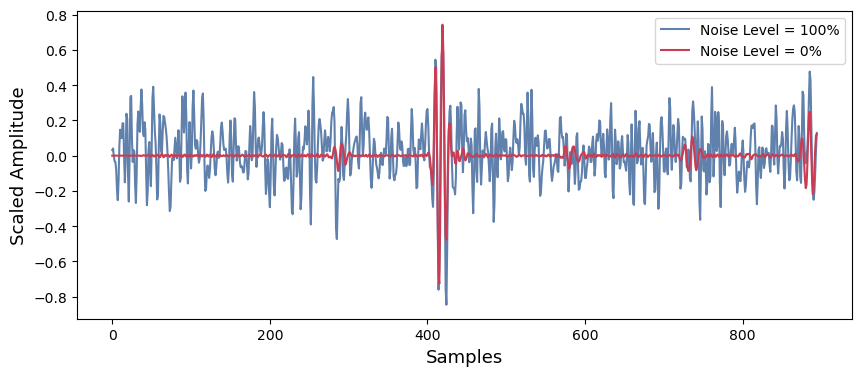

In [68]:
dirname_noise = 'imageGenerate_2022/FMC_variable_noise'

df_snr = pd.DataFrame(columns=np.arange(0, 110, 10))

index = 3501
    
# Read file without noise
filename = f'fmc_{index}_0.mat'

SNR_lst = []
noise = 100

# Read file with noise at noise level
filename_noise = f'fmc_{index}_{noise}.mat'

mat_noise = scipy.io.loadmat(f'{dirname_noise}/{filename_noise}')
fmc_noise = mat_noise['timeTraces'][::5]/1.75e-14

mat = scipy.io.loadmat(f'{dirname_noise}/{filename}')
fmc = mat['timeTraces'][::5]/1.75e-14

# Calculate peak of the original signal
peak = np.max(np.abs(fmc[:,0, 0]))

fig = plt.figure(figsize=(10, 4))
plt.plot(fmc_noise[:, 0, 0], c = '#6181ad', label = 'Noise Level = 100%')
plt.plot(fmc[:, 0, 0], c = '#CA3C53', label = 'Noise Level = 0%')
plt.xlabel('Samples', fontsize = 13)
plt.ylabel('Scaled Amplitude', fontsize = 13)
plt.legend()
plt.show()

# Subsampling Investigation
Using numpy slicing for fast computation:\
https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array


In [78]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
print(list(fmc.shape))
print(type(fmc))

# Best way to subsample
# numpy's slicing, simply start:stop:step
# Sub-sample every 5 data in fmc
fmc_sample = fmc[0::5]

# Bad way to subsample (need to create use extra memory)
# fmc_sample = []
# for i in range(0,list(fmc.shape)[0],5):
#     fmc_sample.append(fmc[i,:,:])
    
fmc_sample = np.array(fmc_sample)
print(fmc_sample.shape)

[4472, 16, 16]
<class 'numpy.ndarray'>
(895, 16, 16)


Text(0, 0.5, 'Amplitude')

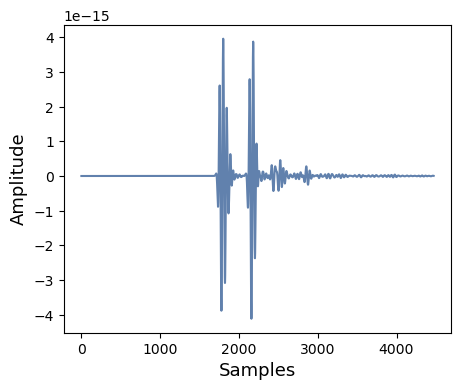

In [81]:
fig, ax = plt.subplots(1, figsize =(5, 4))
ax.plot(fmc[:, 10, 5], c = '#6181ad')
ax.set_xlabel('Samples', fontsize = 13)
ax.set_ylabel('Amplitude', fontsize = 13)

### 1. Compare ths subsampled fmc and original fmc

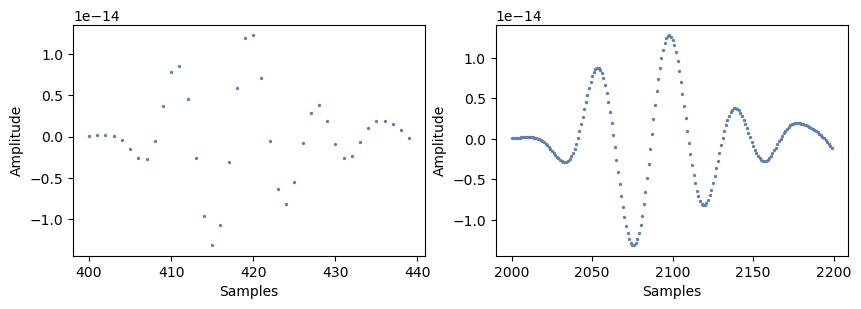

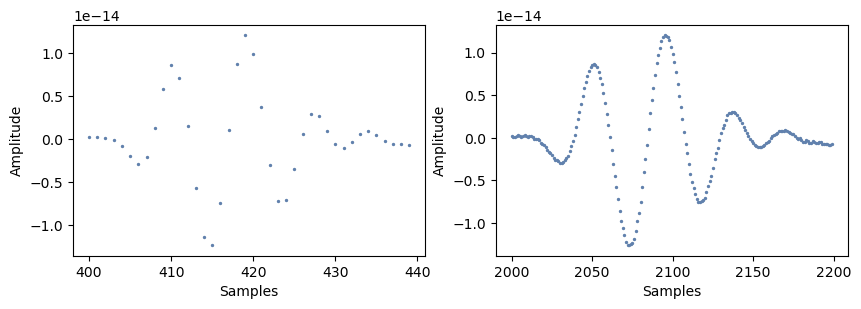

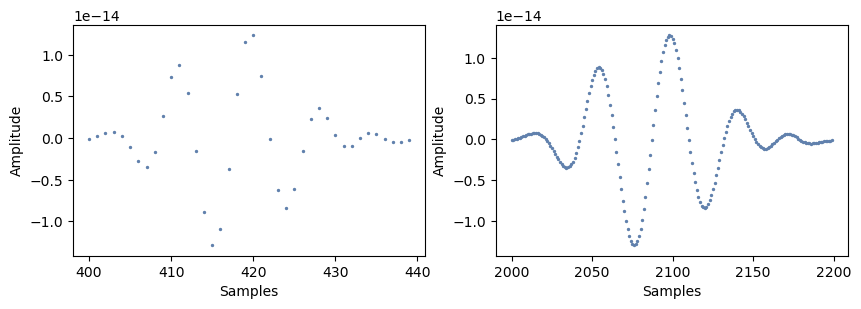

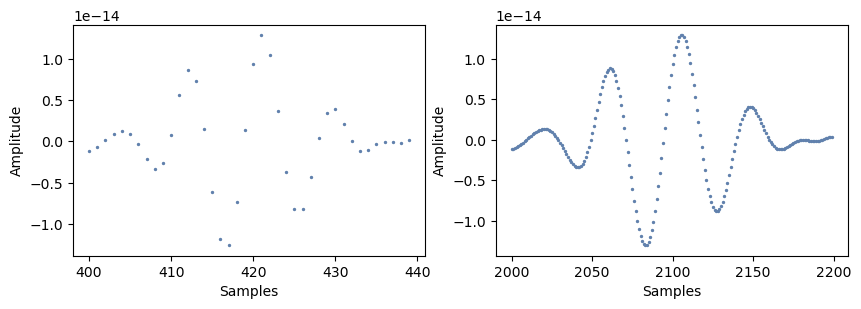

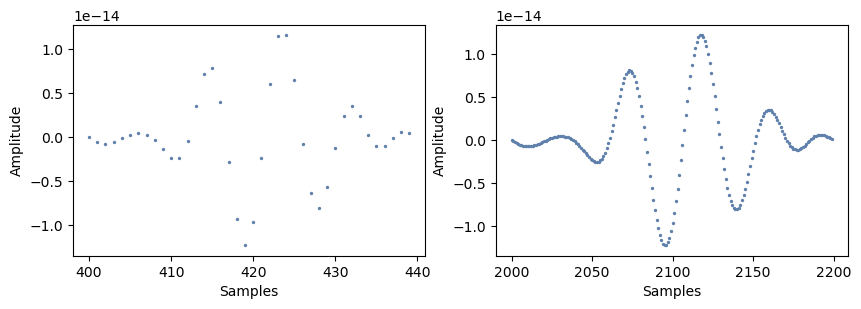

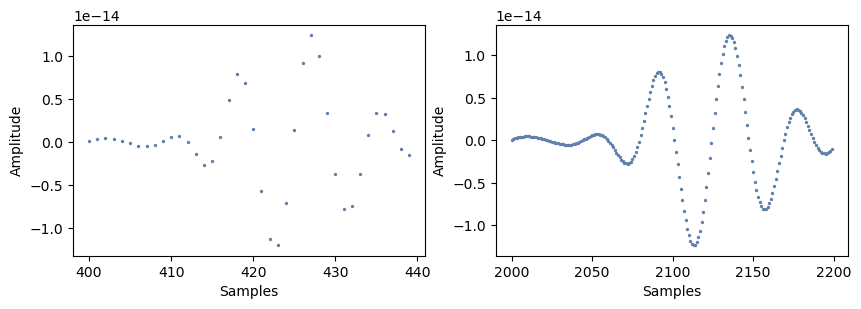

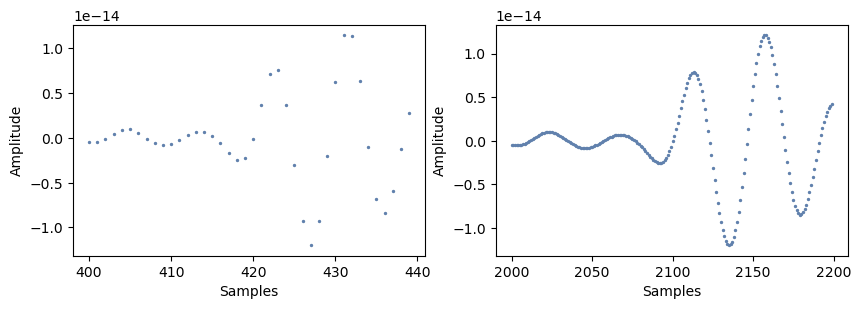

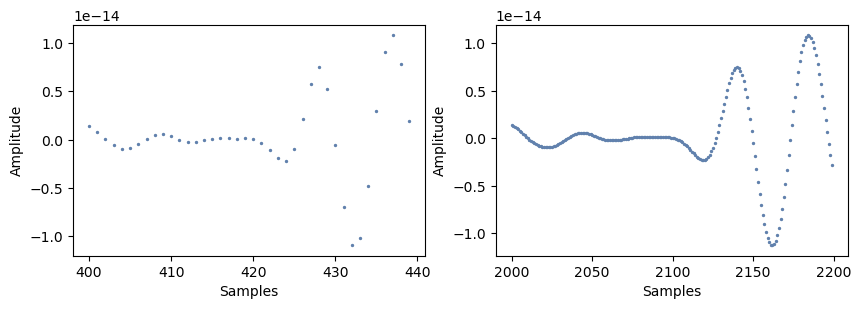

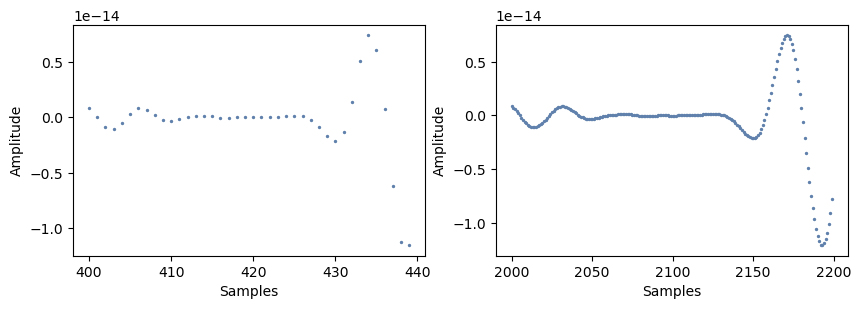

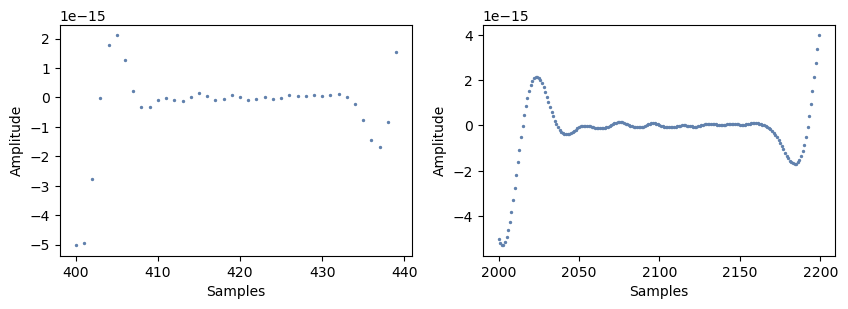

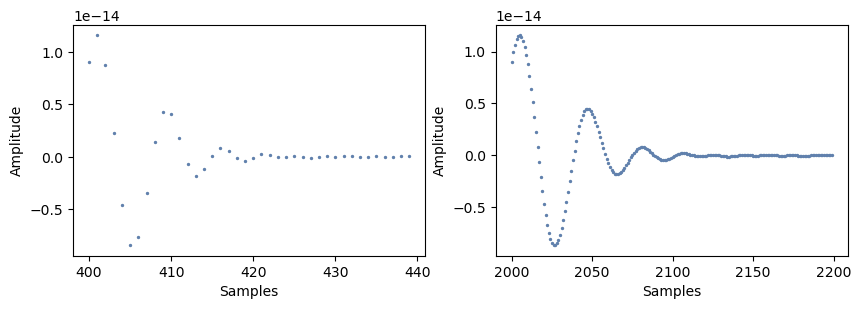

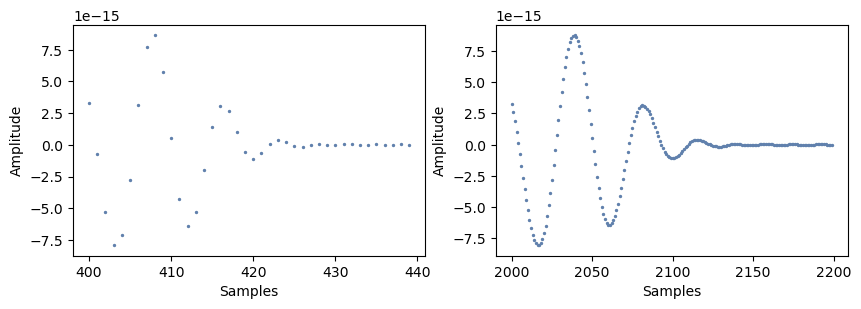

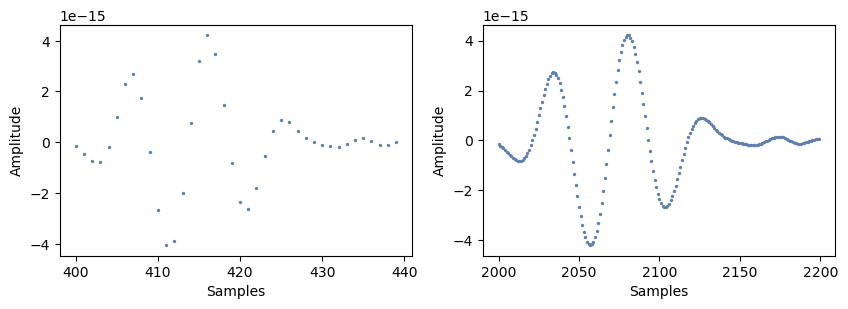

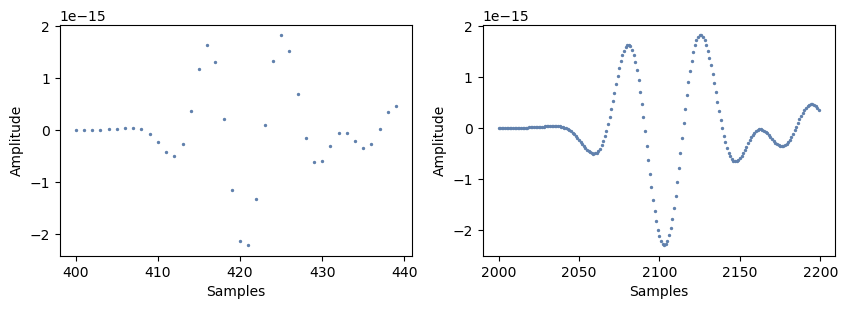

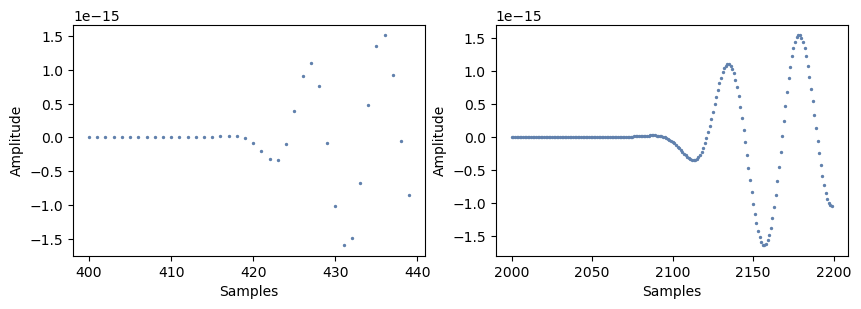

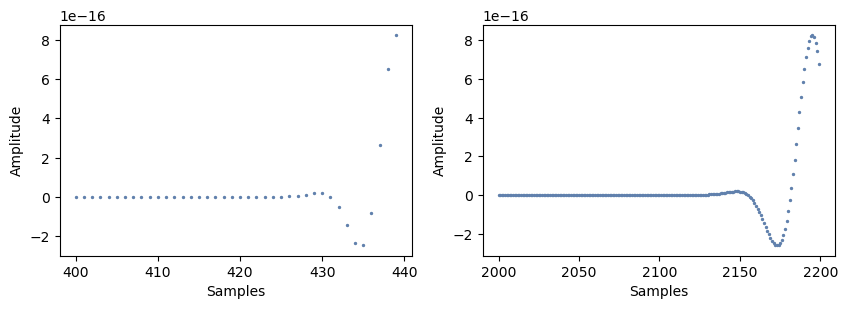

In [77]:
for i in range(0,16):    
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    index1, index2 = 400, 440
    x1 = np.arange(index1, index2, 1)
    x2 = np.arange(index1*5, index2*5, 1)
    
    ax.scatter(x1, fmc_sample[:,1,i][index1:index2], s = 2, c = '#6181ad' )
    ax2.scatter(x2, fmc[:,1,i][index1*5:index2*5], s = 2, c = '#6181ad')
#     ax.plot(x1, fmc_sample[:,1,i][index1:index2])
#     ax2.plot(x2, fmc[:,1,i][index1*5:index2*5])
    
    ax.set_xlabel('Samples')
    ax2.set_xlabel('Samples')
    ax.set_ylabel('Amplitude')
    ax2.set_ylabel('Amplitude')
    plt.show()

# Scaling Investigation

In [37]:
pickle_in = open("data_subsampled_no_backwall_crop_3500_X.pickle","rb")
train_data = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {train_data.shape}')


The shape of entire training dataset: (3500, 895, 16, 16, 1)


In [50]:
train_data[1].shape


(895, 16, 16, 1)

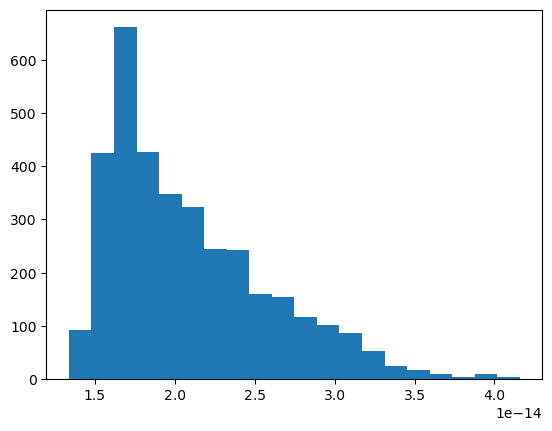

4.158935709060075e-14


In [52]:
max_num = []
for i in range(len(train_data)):
    fmc = train_data[i]
    max_num.append(np.max(fmc))

# plt.style.use('ggplot')
plt.hist(max_num, bins=20)
plt.show()
print(np.max(max_num))

In [19]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(3,2,2)
np.max(a)

12

# Other

(895, 16, 16)
Difference between pair -0.0


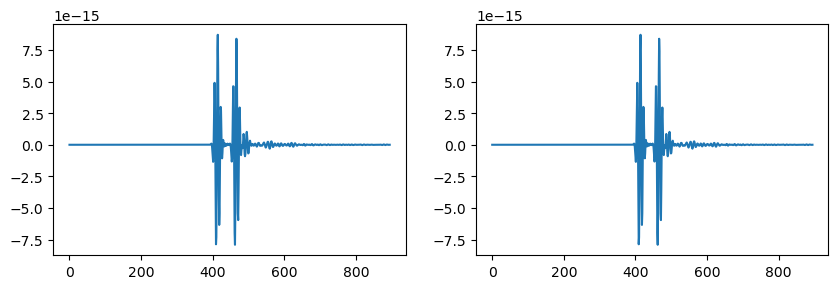

Difference between pair -0.0


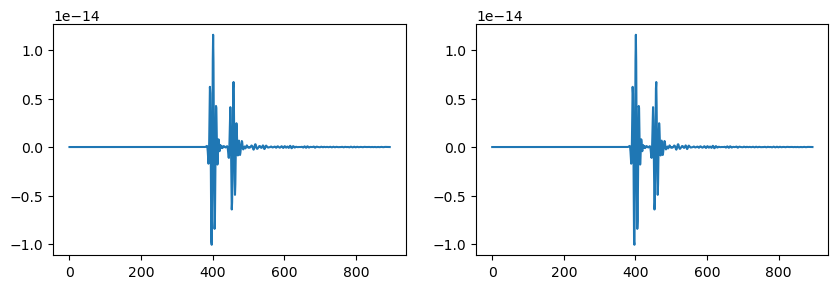

Difference between pair 0.0


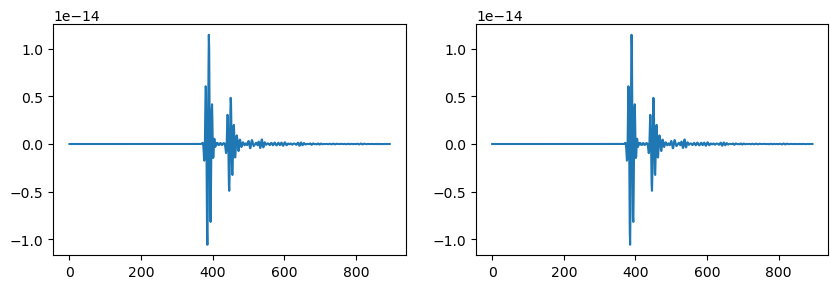

Difference between pair 0.0


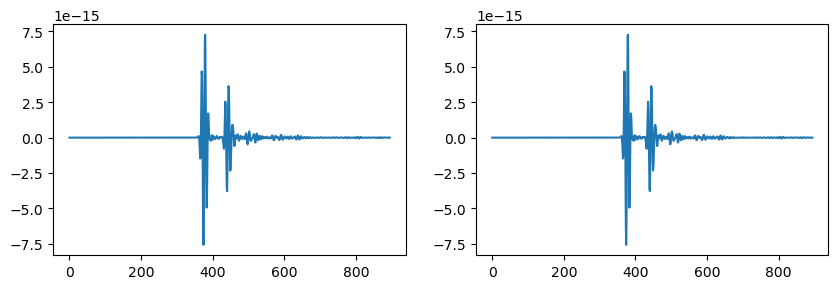

Difference between pair -0.0


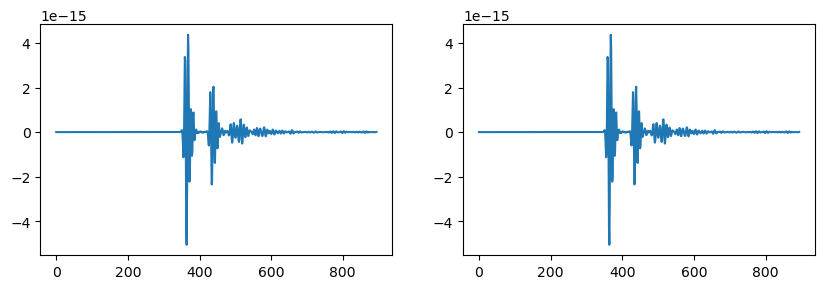

Difference between pair -0.0


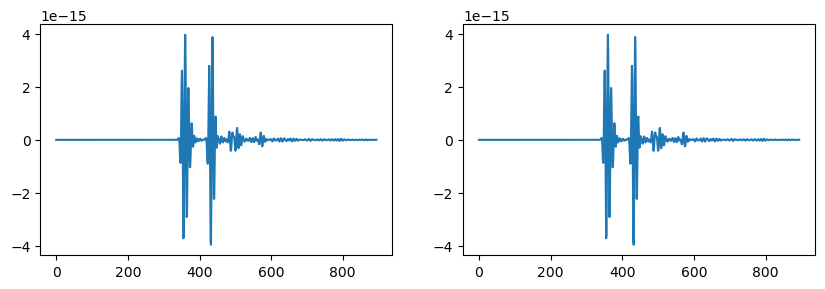

Difference between pair -0.0


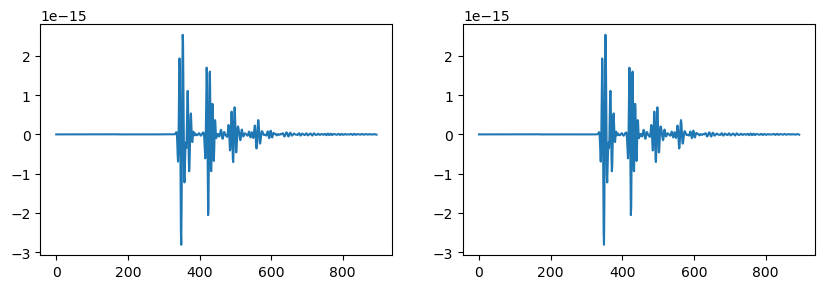

Difference between pair 0.0


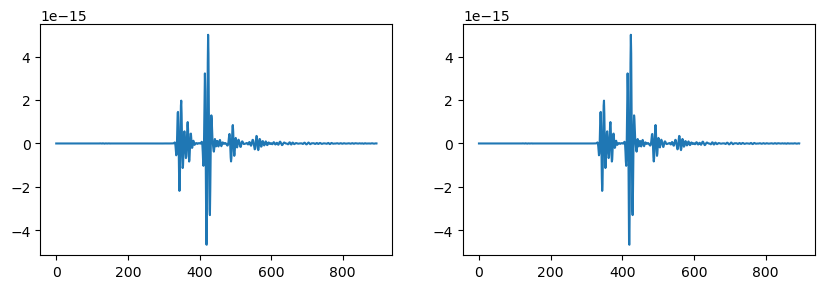

Difference between pair -0.0


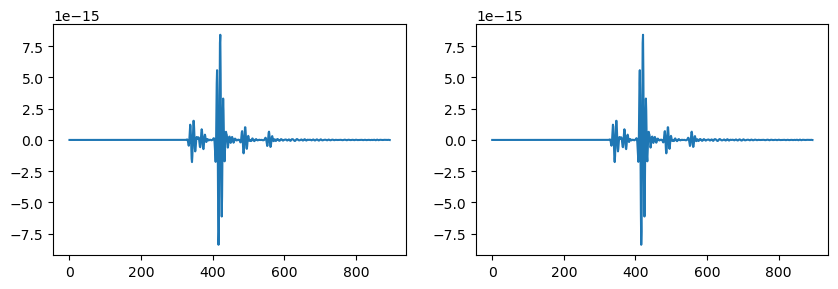

Difference between pair 0.0


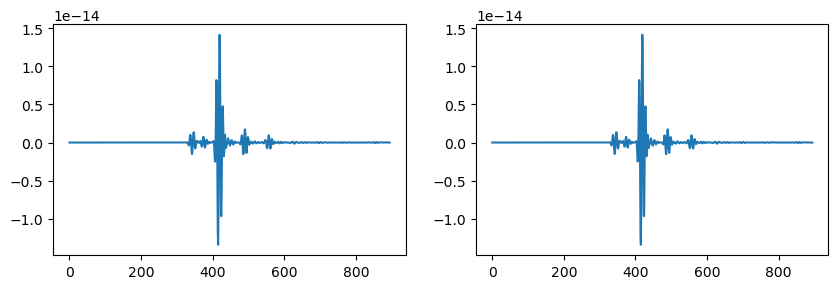

Difference between pair 0.0


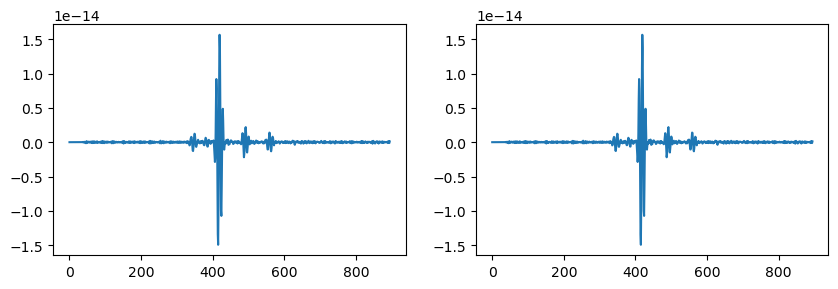

Difference between pair -0.0


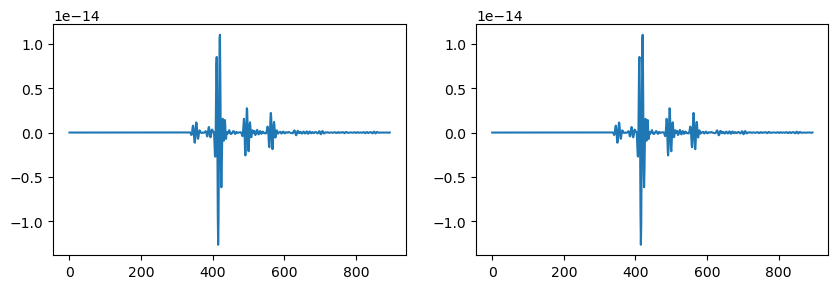

Difference between pair -0.0


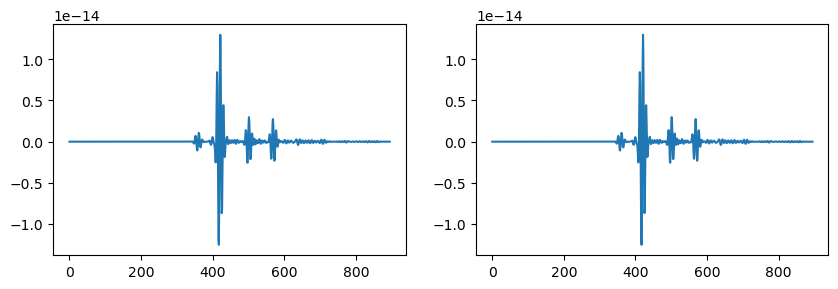

Difference between pair -0.0


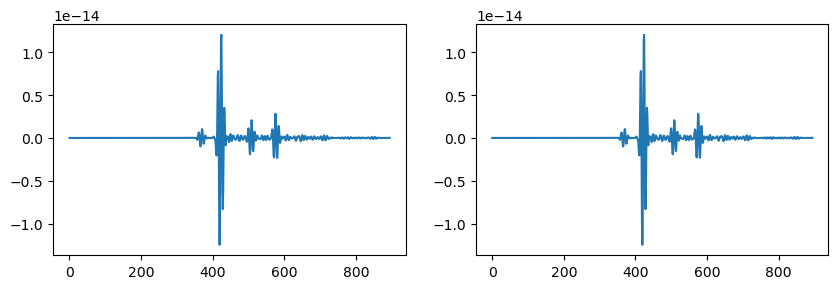

Difference between pair 0.0


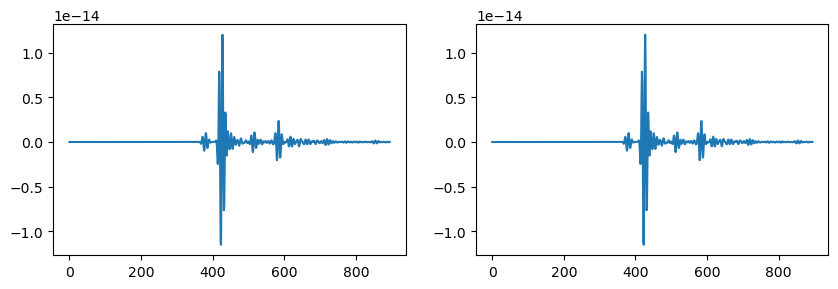

Difference between pair -0.0


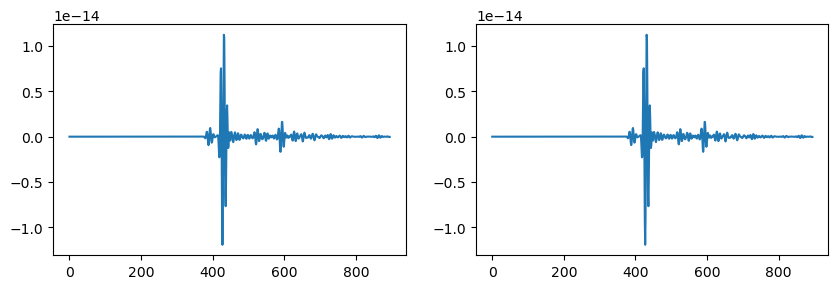

In [17]:
randnum = 10
fmc_sample = fmc[0::5]
print(fmc_sample.shape)

for i in range(0,16): 
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.plot(fmc_sample[:,i,randnum])
    ax2.plot(fmc_sample[:,randnum,i])
    diff = np.sum(fmc_sample[:,i,randnum]-fmc_sample[:,randnum,i])
    print(f'Difference between pair {round(diff, 5)}')
    plt.show()

## Max

In [10]:
import numpy as np
fmc_csv = np.loadtxt('FMC.csv', delimiter=',')

In [59]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces'].reshape(-1, 256)
(npxf, npyf) = fmc.shape


FMCs = np.zeros((npxf, npyf))
FMCs[:, :] = fmc

print(FMCs.shape)
a = np.expand_dims(FMCs, axis = 2)

(4472, 256)


In [60]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
fmc = fmc[0::5] / 1.75e-14
fmc.shape

(895, 16, 16)